In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 1. experiment - comparison of architectures

In [2]:
paths = {'ResNet': os.path.join('resnet', 'resnet_results.csv'),
         'VGG': os.path.join('vgg', 'vgg_results.csv'),
         'FC': 'fully_connected_results.csv',
         'CNN': 'simple_cnn_results.csv'}

df_architectures = pd.DataFrame()

for name, p in paths.items():
    tmp = pd.read_csv(p, index_col=0)
    tmp['model'] = name
    df_architectures = pd.concat([df_architectures, tmp])

df_architectures

,seed,loss,categorical_accuracy,categorical_crossentropy,model
0,0,0.321699,0.9230,0.321699,ResNet
1,1,0.345969,0.9231,0.345969,ResNet
2,2,0.334492,0.9244,0.334492,ResNet
3,3,0.353584,0.9241,0.353584,ResNet
4,4,0.389257,0.9241,0.389257,ResNet
5,5,0.299078,0.9241,0.299078,ResNet
6,6,0.341204,0.9256,0.341204,ResNet
7,7,0.353355,0.9230,0.353355,ResNet
8,8,0.331920,0.9229,0.331920,ResNet
9,9,0.355810,0.9198,0.355810,ResNet


Text(0.5, 0.98, 'Comparison of different architectures')

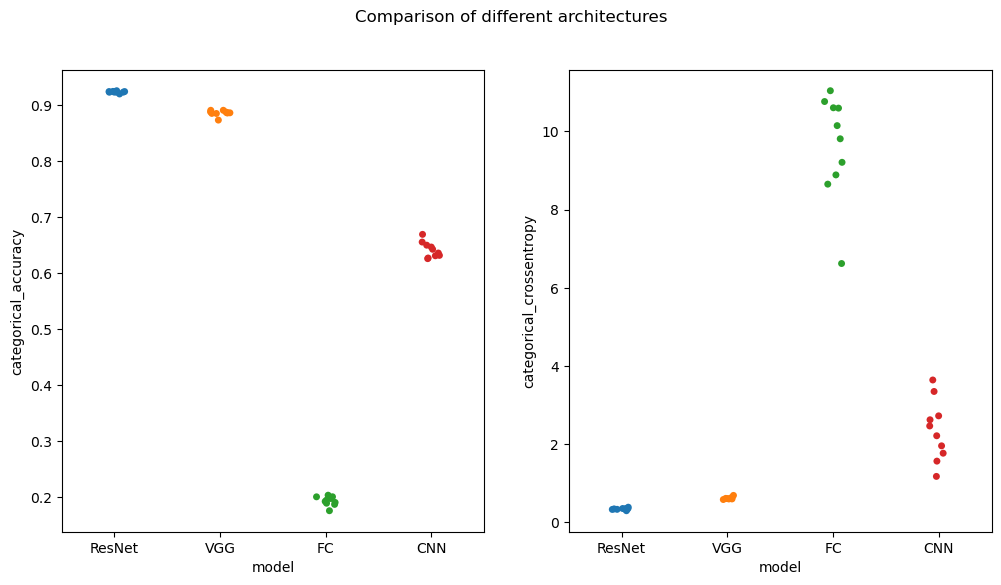

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.stripplot(df_architectures, x='model', y='categorical_accuracy', hue='model', ax=ax[0])
sns.stripplot(df_architectures, x='model', y='categorical_crossentropy', hue='model', ax=ax[1])
ax[0].get_legend().remove()
ax[1].get_legend().remove()
fig.suptitle("Comparison of different architectures")

## 2. experiment - training parameters

In [4]:
df_optim = pd.read_csv('optim_results.csv', index_col=0)

Text(0.5, 0.98, 'Comparison of different optimizers for simple CNN')

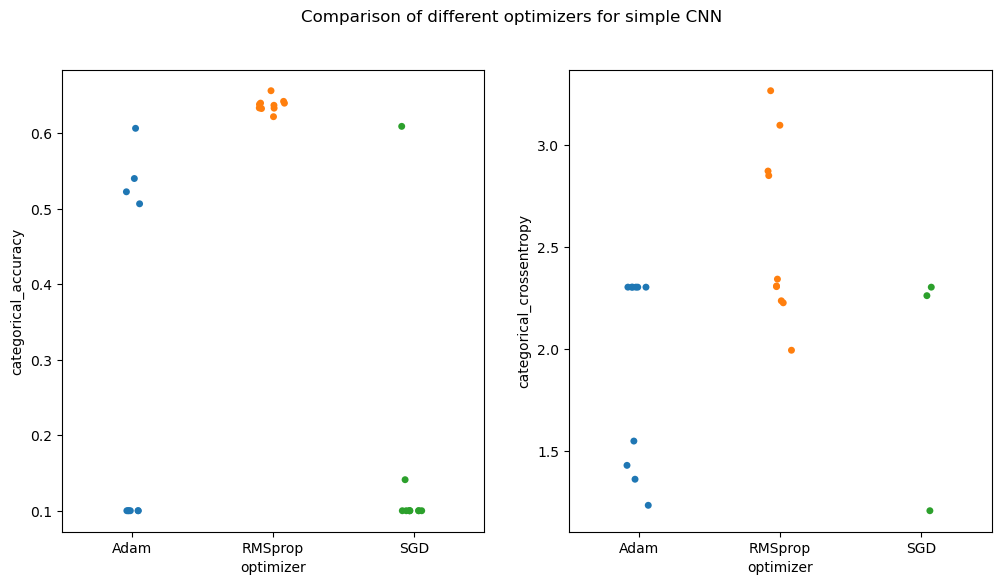

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.stripplot(df_optim, x='optimizer', y='categorical_accuracy', hue='optimizer', ax=ax[0])
sns.stripplot(df_optim, x='optimizer', y='categorical_crossentropy', hue='optimizer', ax=ax[1])
ax[0].get_legend().remove()
ax[1].get_legend().remove()
fig.suptitle("Comparison of different optimizers for simple CNN")

Text(0.5, 0.98, 'Comparison of different learning rate for simple CNN')

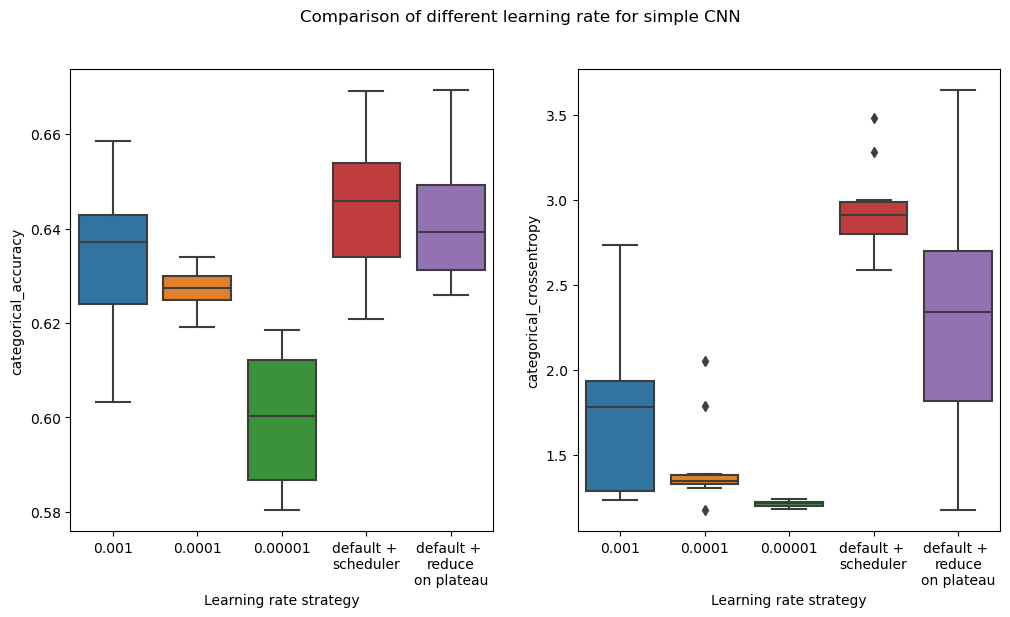

In [6]:
df_lr = pd.read_csv('learning_rate_results.csv', index_col=0)
df_cnn = df_architectures.loc[df_architectures['model'] == 'CNN'].copy()
df_cnn['lr_strategy'] = 'default + reduce on plateau'
df_lr = pd.concat([df_lr, df_cnn])
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(df_lr, x='lr_strategy', y='categorical_accuracy', ax=ax[0])
labels = ['0.001', '0.0001', '0.00001', 'default + \nscheduler', 'default + \nreduce\non plateau']
ax[0].set_xticks(list(range(5)), labels)
ax[0].set_xlabel("Learning rate strategy")
sns.boxplot(df_lr, x='lr_strategy', y='categorical_crossentropy', ax=ax[1])
ax[1].set_xticks(list(range(5)), labels)
ax[1].set_xlabel("Learning rate strategy")
fig.suptitle("Comparison of different learning rate for simple CNN")

## 2. experiment - regularization

In [7]:
# prepare baseline results
df_resnet = df_architectures.loc[df_architectures['model']=='ResNet'].copy()
df_resnet.loc[:, 'regularizer'] = "Default"
df_resnet.loc[:, 'rate'] = 0
df_resnet.loc[:, 'transformation'] = "None"

Text(0.5, 0.98, 'Comparison of different dropout rate for ResNet')

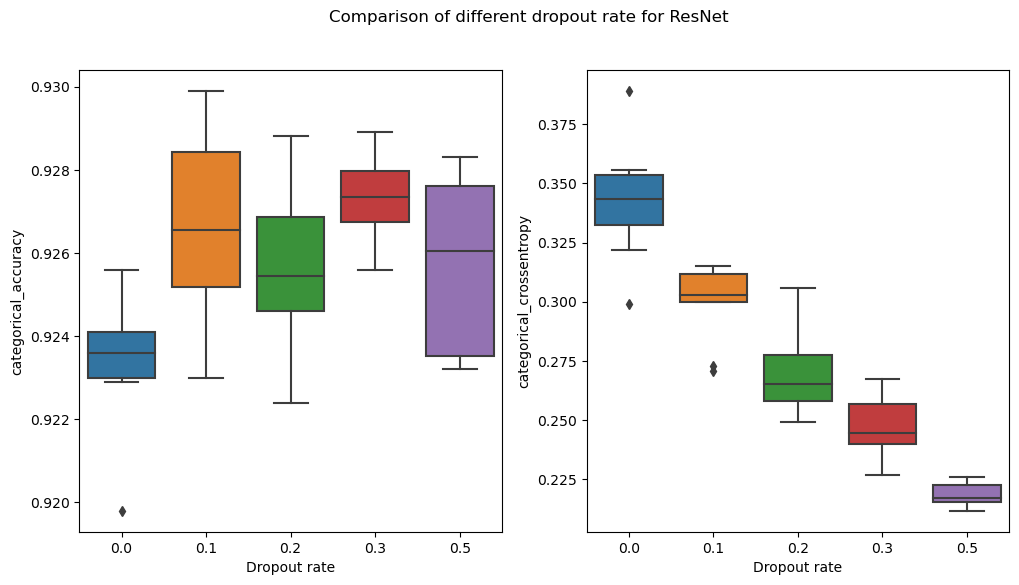

In [8]:
df_dropout = pd.read_csv(os.path.join('resnet', 'dropout_results.csv'), index_col=0)
df_reg = pd.read_csv(os.path.join('resnet', 'l1_l2_results.csv'), index_col=0)

df_dropout = pd.concat([df_dropout, df_resnet])
df_reg = pd.concat([df_reg, df_resnet])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(df_dropout, x='rate', y='categorical_accuracy', ax=ax[0])
ax[0].set_xlabel("Dropout rate")
sns.boxplot(df_dropout, x='rate', y='categorical_crossentropy', ax=ax[1])
ax[1].set_xlabel("Dropout rate")
fig.suptitle("Comparison of different dropout rate for ResNet")

Text(0.5, 0.98, 'Comparison of different regularization for ResNet')

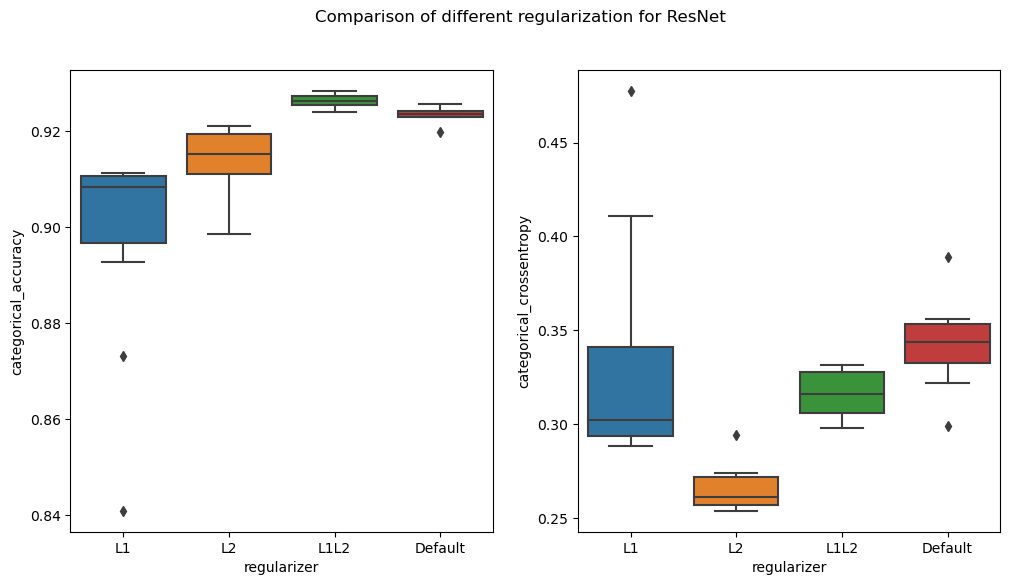

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(df_reg, x='regularizer', y='categorical_accuracy', ax=ax[0])
sns.boxplot(df_reg, x='regularizer', y='categorical_crossentropy', ax=ax[1])
fig.suptitle("Comparison of different regularization for ResNet")


## 3. experiment - data augmentation

In [10]:
df_aug = pd.read_csv('simple_augmentation_results.csv', index_col=0)

df_cutmix = pd.read_csv(os.path.join('resnet', 'cutmix.csv'), index_col=0)
df_cutmix['transformation'] = 'cutmix'

df_mixup = pd.read_csv(os.path.join('resnet', 'mixup.csv'), index_col=0)
df_mixup['transformation'] = 'mixup'


df_aug = pd.concat([df_aug, df_cutmix, df_mixup])
df_aug = pd.concat([df_aug, df_resnet])

Text(0.5, 0.98, 'Comparison of different augmentation techniques for ResNet')

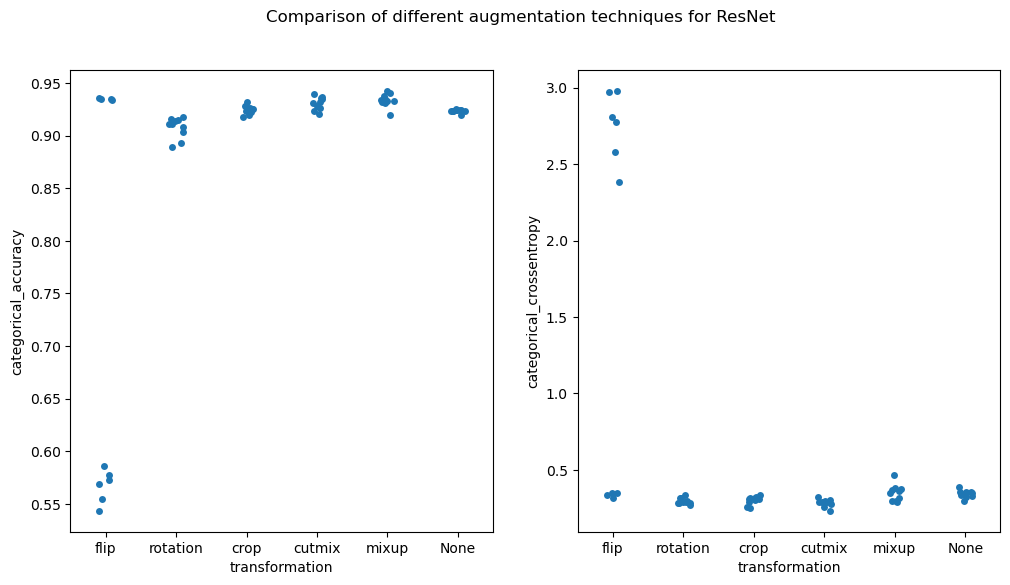

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.stripplot(df_aug, x='transformation', y='categorical_accuracy', ax=ax[0])
sns.stripplot( df_aug, x='transformation', y='categorical_crossentropy', ax=ax[1])
fig.suptitle("Comparison of different augmentation techniques for ResNet")